# Lab 5
### LHC Particle Physics Data
Noah Kim
Section AC

In [9]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import scipy
import pickle
matplotlib.rc('font', size=22)
matplotlib.rc('figure', figsize=(18, 10))

Reading the data

In [10]:
infile1 = open ("higgs_100000_pt_250_500.pkl","rb")
signal_data = pickle.load(infile1)
infile2 = open ("qcd_100000_pt_250_500.pkl", "rb")
qcd_data = pickle.load(infile2)
signal_data.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [11]:
signal = pd.DataFrame(data = signal_data, columns = signal_data.keys())
background = pd.DataFrame(data = qcd_data, columns = qcd_data.keys())
signal[0:20]

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,472.074292,0.137052,-2.535145,125.150365,0.126581,0.002633,1.298020,0.008218,0.739787,0.283689,0.174944,0.383474,0.616674,0.557407
1,470.405678,-0.039157,0.069669,130.552672,0.118071,0.002379,1.445626,0.013822,0.747927,0.234281,0.193354,0.313240,0.825308,0.704650
2,438.008357,-0.181139,-3.031083,125.703063,0.167344,0.004623,0.986597,0.004545,1.001379,0.440523,0.218649,0.439917,0.496338,0.487496
3,484.860421,0.251986,2.855706,126.215853,0.119238,0.002066,1.218467,0.006740,0.761892,0.228160,0.193810,0.299465,0.849449,0.594872
4,486.141137,-1.917812,-2.221953,132.182504,0.103632,0.001438,1.291784,0.000398,0.722656,0.166851,0.148080,0.230886,0.887497,0.678118
5,475.798645,1.678998,0.309122,125.676535,0.144900,0.001321,0.434366,0.000124,1.089226,0.095011,0.086523,0.087228,0.910669,0.507167
6,470.814879,-2.123238,-3.034306,127.654008,0.158736,0.003725,0.931205,0.000052,1.072702,0.404063,0.128649,0.376677,0.318388,0.467436
7,471.734591,1.564844,-2.579042,124.166569,0.144069,0.002839,0.949356,0.000381,1.046748,0.258071,0.205686,0.246546,0.797014,0.477715
8,483.043350,1.057999,0.237895,122.130353,0.098300,0.002852,3.002267,0.003114,0.762666,0.402488,0.224324,0.527739,0.557343,0.194003
9,484.359373,1.076703,1.851916,125.191446,0.135803,0.001388,0.554000,0.000601,1.028446,0.107116,0.086189,0.104153,0.804630,0.494019


In [12]:
background[0:20]

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,489.631389,1.955969,1.803007,125.298720,0.099409,0.003247,3.304886,0.000528,0.846096,0.586658,0.439468,0.693370,0.749105,0.333731
1,401.041884,-1.170413,0.188817,88.047054,0.101181,0.002527,2.439089,0.001561,0.852379,0.517657,0.336052,0.607308,0.649178,0.477481
2,447.487556,1.861736,-2.326646,85.794174,0.069372,0.001375,4.118371,0.000197,0.979133,0.815123,0.700152,0.832495,0.858953,0.117091
3,402.652836,1.276421,-1.124176,42.947328,0.032095,0.000266,8.038338,0.001144,1.020193,0.664347,0.617499,0.651197,0.929482,0.054606
4,484.257672,-1.272225,1.966794,59.542227,0.038348,0.000358,6.353842,0.001619,0.875408,0.436270,0.376816,0.498362,0.863723,0.095201
5,499.007150,-0.852358,-1.648955,52.252029,0.011753,0.000057,35.224665,0.003845,0.729329,0.706101,0.603894,0.968151,0.855251,0.063496
6,457.703594,-0.399451,2.464253,87.720057,0.071941,0.001450,3.893483,0.005817,0.876954,0.622606,0.451220,0.709964,0.724728,0.575403
7,374.490278,-1.767709,0.418387,59.648629,0.038888,0.000517,8.789223,0.000385,0.868643,0.673827,0.587490,0.775724,0.871871,0.339162
8,419.824958,-2.405049,-2.830589,74.236311,0.076338,0.001458,3.276554,0.000063,0.941479,0.701598,0.599033,0.745208,0.853813,0.215824
9,474.301472,0.357243,0.953488,41.904503,0.012366,0.000051,26.875685,0.004167,0.967177,0.845653,0.696237,0.874353,0.823312,0.258695


* $p_T$, the transverse momentum
* $\eta$, the pseudorapidity
* $\phi$, the azimuthal angle
* $M$, the mass
* $e_N$, the N-point energy correlation function (ECF)
* $D_2$, a dimensionless ratio of ECFs, defined as $e_3/(e_2)^3$
* $a_3$, the angularity, an observable related to the symmetry of energy flow inside a jet
* $\tau_N$, the "N-subjettiness"
* $\tau_{NM}$, the ratio of "N-subjettiness" to "M-subjettiness"
* $k_t\Delta R$, the angular separation of the branches of a jet

## $p_T$, the transverse momentum
Transverse momentum is the momentum perpendicular to the beam direction. This is an important clue for detection. Colliding particles have only the longitudinal momentum, no transverse component. By the conservation of momentum, the sum of transverse momentum after the collision should sum to zero. Therefore, by tracing the transverse momentum of resulting particles, we can determine whether there is a discovery or not. $P_T$ is calculated as the following.

$$P_T=\sqrt{P_x^2+P_y^2}$$

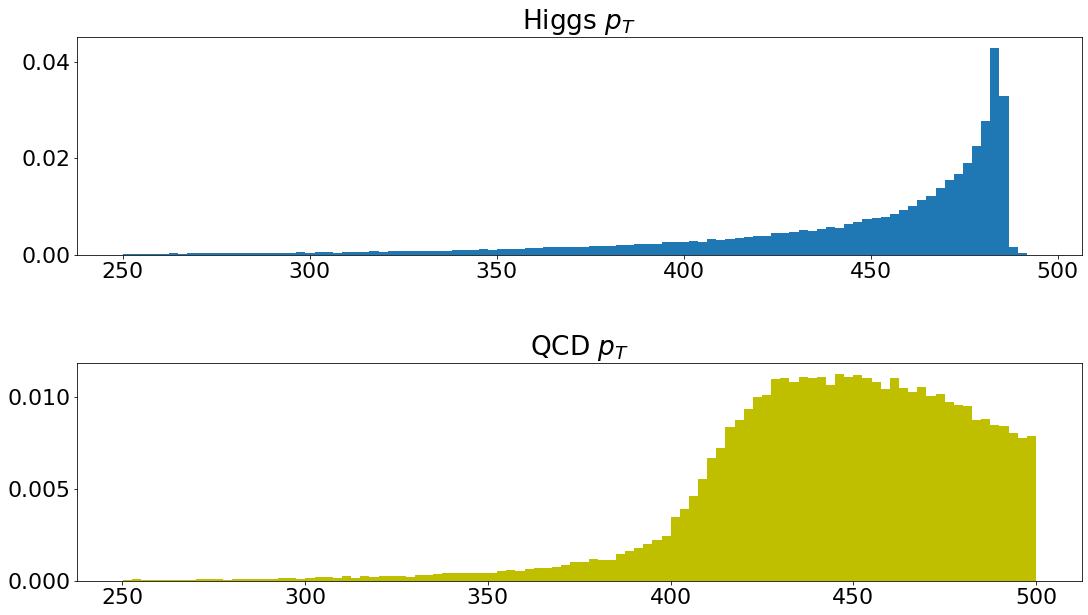

In [13]:
fig, ax = plt.subplots(2,1)
fig.subplots_adjust(hspace=0.5)
H_pt = signal['pt'][:]
qcd_pt = background['pt'][:]
ax[0].hist(H_pt, bins=100, density=True);
ax[0].set_title('Higgs $p_T$')
ax[1].hist(qcd_pt, bins=100, density=True, color = 'y');
ax[1].set_title('QCD $p_T$');

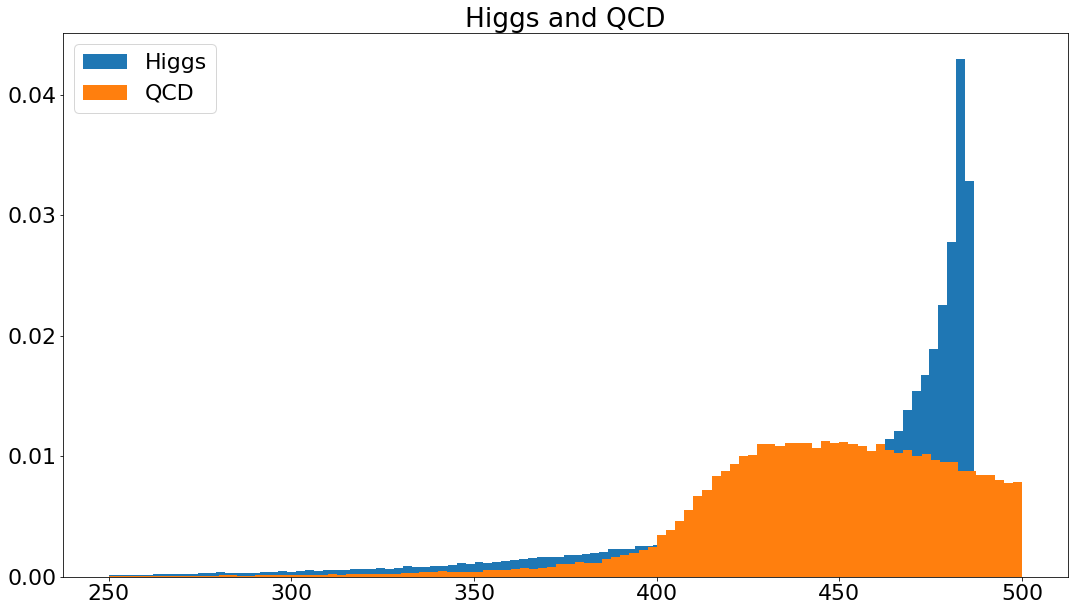

In [14]:
plt.hist(H_pt,bins=100,density = True);
plt.hist(qcd_pt,bins=100, density=True);
plt.legend(['Higgs', 'QCD']);
plt.title('Higgs and QCD');

Both data are from 250 to 500 $P_T$. Both Higgs and QCD are not so probable in lower $P_T$. Their probability rise quite dramatically in the higher $P_T$. QCD's probability is smoothly spread over in the range 420~500, while Higgs spikes up in around 480.

## $\eta$, the pseudorapidity, $\phi$, the azimuthal angle


Pseudorapidity, $\eta$, is directly related to the vertical angle of a jet, $\theta$, because it is calculated as

$$\eta=-ln(tan\frac{\theta}{2})=-\frac{1}{2}ln\frac{|P|+P_L}{|P|-P_L}$$
Where $P_L$ is the longitudinal momentum. $\eta$ is preferred over $\theta$ in particle physics because particle production is constant as a function of $\eta$. The relationship between $\theta$ and $\eta$ is as the table below. $\eta$ ranges between $(-\infty,\infty)$

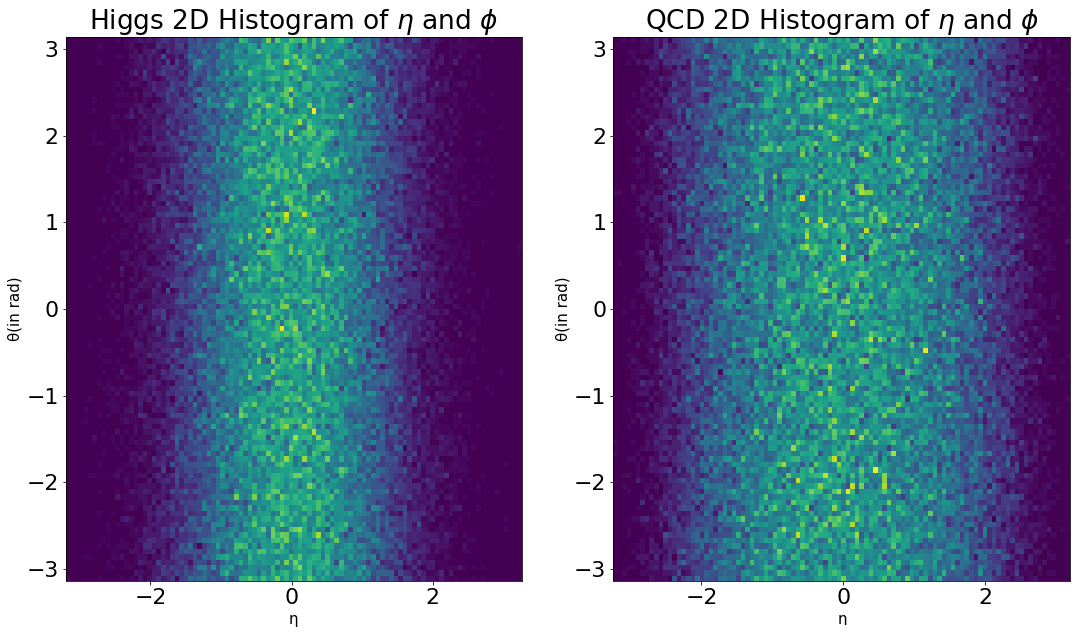

In [15]:
H_n = signal['eta'][:]
H_phi = signal['phi'][:]
QCD_n = background['eta'][:]
QCD_phi = background['phi'][:]

fig2, ax = plt.subplots(1,2)
ax[0].hist2d(H_n, H_phi, bins=100);
ax[0].set_title('Higgs 2D Histogram of $\eta$ and $\phi$');
ax[0].set_xlabel("\u03B7",fontsize=15)
ax[0].set_ylabel("\u03B8(in rad)",fontsize=15)
ax[1].hist2d(QCD_n,QCD_phi,bins=100);
ax[1].set_title('QCD 2D Histogram of $\eta$ and $\phi$');
ax[1].set_xlabel("\u03B7",fontsize=15);
ax[1].set_ylabel("\u03B8(in rad)",fontsize=15);

From above plot we see that the jet direction from Higgs data is mostly in vertically ranges from -0.75 to 0.75 and in horizontally spans the whole range $-\pi$ to $\pi$ (pretty much entire horizontal angle).

On the other hand, QCD data is more spread over in vertical angle range -1.75 to 1.75 and the entire horizontal angle.

Thus, Jet direction from higgs data is confined in a narrower range of vertical angle than the QCD. QCD spans over pretty much entire vertical angle that it would be not entirely wrong to say that it is not confined within any range.

## $M$, the invariant mass

Invariant mass is a mass of an object that is independent of the reference frame. Loosely speaking, we can simply take it as a mass of an object. It is calculated by the formula,
$$m^2=E^2-P^2$$

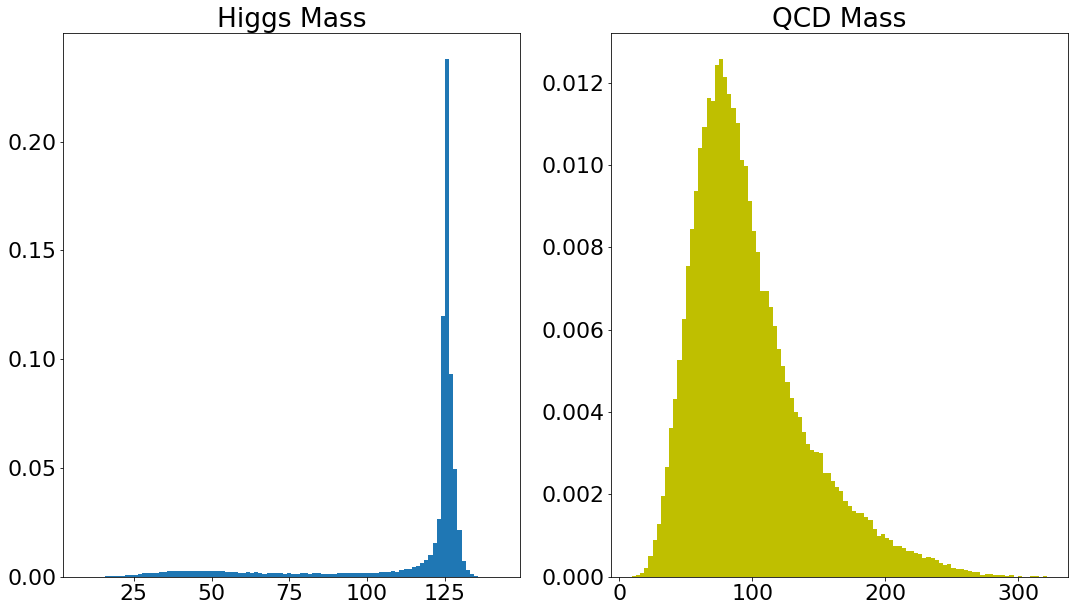

In [16]:
H_mass = signal['mass'][:]
QCD_mass = background['mass'][:]

fig, ax = plt.subplots(1,2)
ax[0].hist(H_mass, bins=100, density=True);
ax[0].set_title('Higgs Mass')
ax[1].hist(QCD_mass, bins=100, density=True, color = 'y');
ax[1].set_title('QCD Mass');

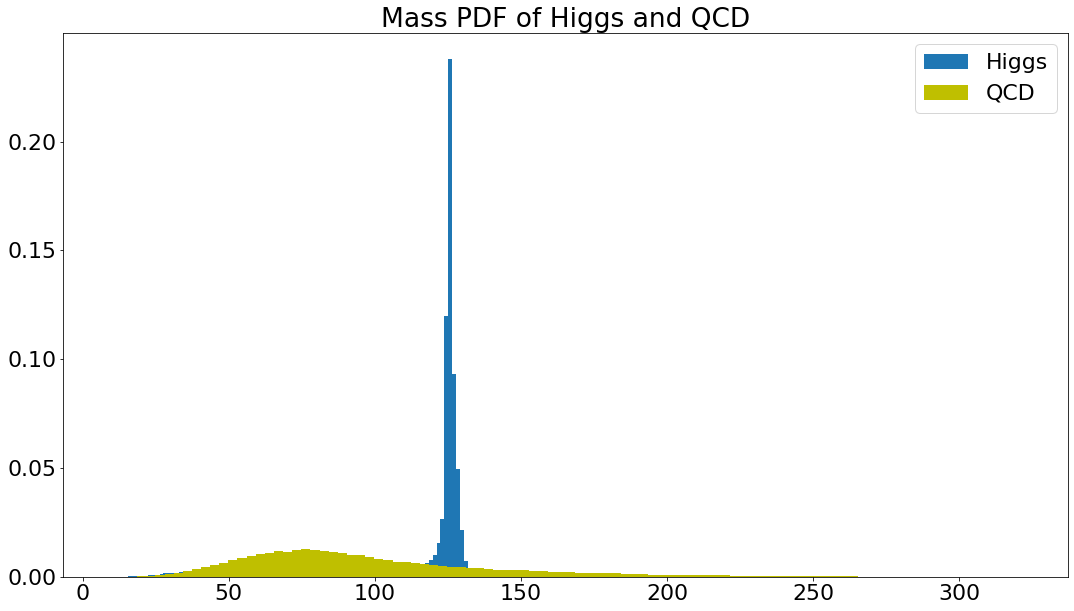

In [17]:
plt.hist(H_mass, bins=100,density=True);
plt.hist(QCD_mass, bins=100, color='y',density=True);
plt.legend(['Higgs', 'QCD']);
plt.title('Mass PDF of Higgs and QCD');

From the plot above, the QCD data smoothly ranges from 40 - 150 and the Higgs data spikes at around 125-135 but spikes in frequency vastly higher than the QCD. We can interpret this as it means that Higgs data is the collection of data of a particle we are targeting to get and that QCD data is a collection of the rest of the things (backgrounds).

## $e_N$, the N-point energy correlation function (ECF)


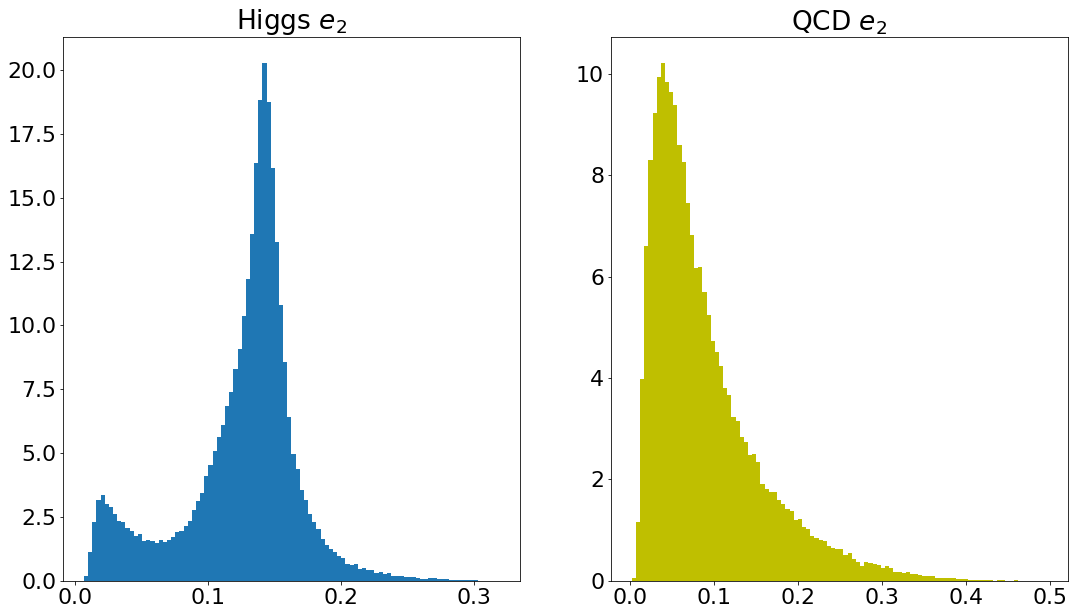

In [18]:
H_ee2 = signal['ee2'][:]
QCD_ee2 = background['ee2'][:]
H_ee3 = signal['ee3'][:]
QCD_ee3 = background ['ee3'][:]

fig, ax = plt.subplots(1,2)
ax[0].hist(H_ee2, bins=100, density=True);
ax[0].set_title('Higgs $e_2$')
ax[1].hist(QCD_ee2, bins=100, density=True, color = 'y');
ax[1].set_title('QCD $e_2$');

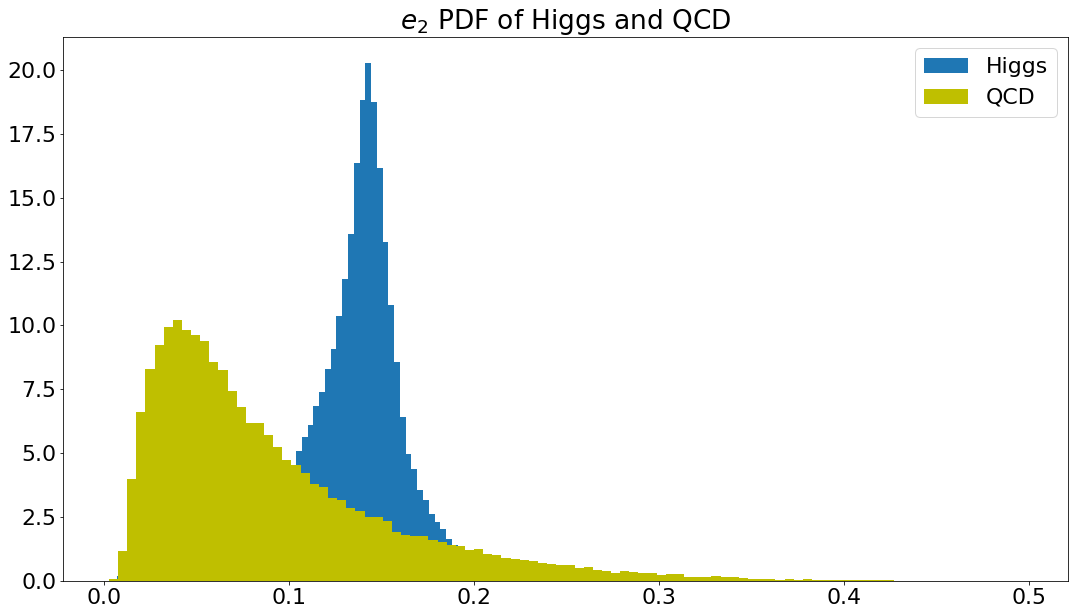

In [19]:
plt.hist(H_ee2, bins=100,density=True);
plt.hist(QCD_ee2, bins=100, color='y',density=True);
plt.legend(['Higgs', 'QCD']);
plt.title('$e_2$ PDF of Higgs and QCD');

For e2 data, data for higgs shows a shape that shows skew points at around $e_2=0.02$ and $e_2=0.15$, while QCD data is more like a rayleigh distribution with its peak at around $e_2=0.05$.

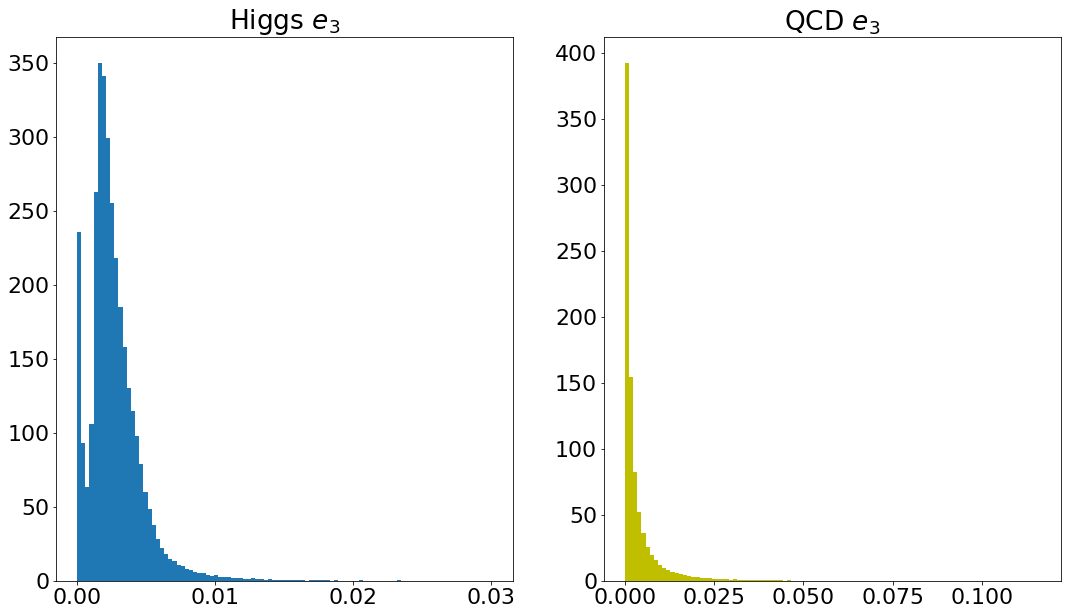

In [20]:
fig, ax = plt.subplots(1,2)
ax[0].hist(H_ee3, bins=100, density=True);
ax[0].set_title('Higgs $e_3$')
ax[1].hist(QCD_ee3, bins=100, density=True, color = 'y');
ax[1].set_title('QCD $e_3$');

Text(0.5, 1.0, '$e_3$ PDF of Higgs and QCD')

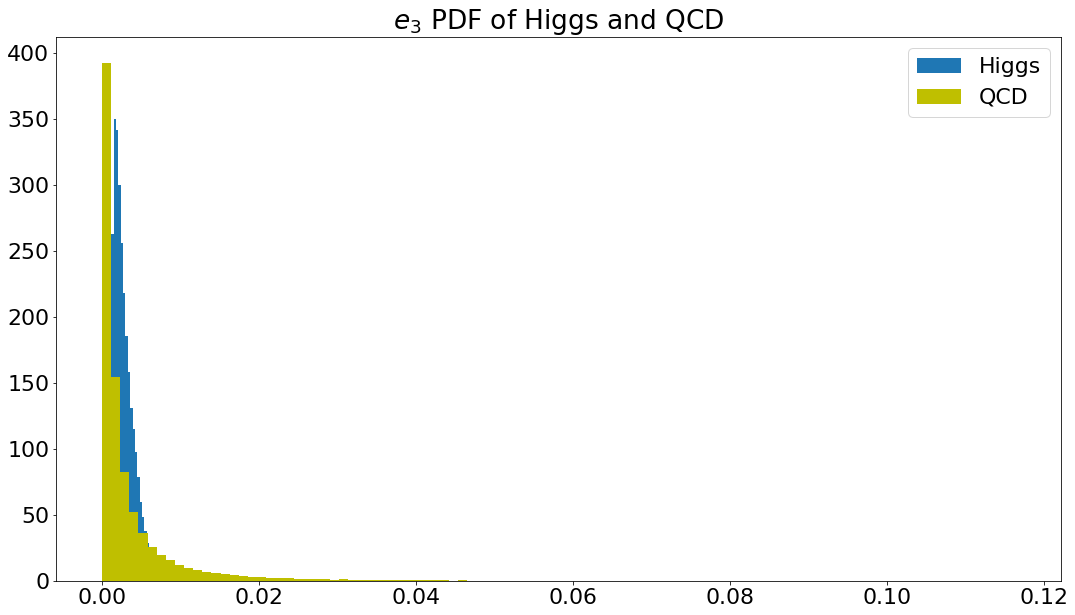

In [21]:
plt.hist(H_ee3, bins=100,density=True);
plt.hist(QCD_ee3, bins=100, color='y',density=True);
plt.legend(['Higgs', 'QCD']);
plt.title('$e_3$ PDF of Higgs and QCD')

In case of $e_3$ data, the distribution is more dramatic. Both of the data spike up at roughly close to $e_3=0$. Higgs data still contains the two peak points similar to $e_2$. QCD data just spikes up at around $e_3=0.005$. Both data seems to have cut-off at $e_3=0$.

## $D_2$, a dimensionless ratio of ECFs, defined as $e_3/(e_2)^3$
$D_2$ represents the ratio between $e_2$ and $e_3$. This was calcualted as below.

$$D_2=\frac{e_3}{(e_2)^3}$$

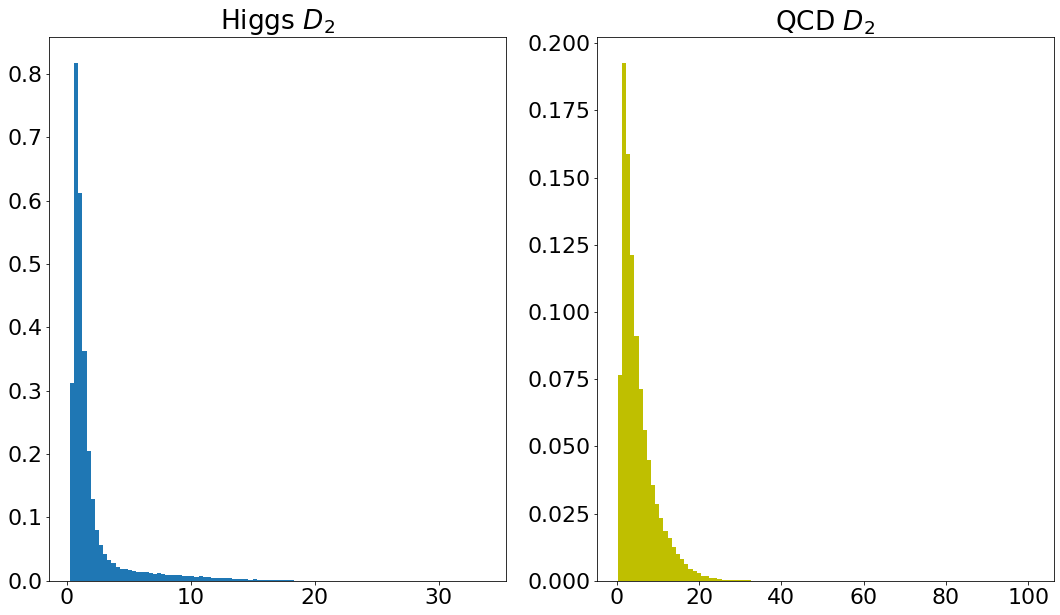

In [22]:
H_d2 = signal['d2'][:]
QCD_d2 = background['d2'][:]

fig, ax = plt.subplots(1,2)
ax[0].hist(H_d2, bins=100, density=True);
ax[0].set_title('Higgs $D_2$')
ax[1].hist(QCD_d2, bins=100, density=True, color = 'y');
ax[1].set_title('QCD $D_2$');

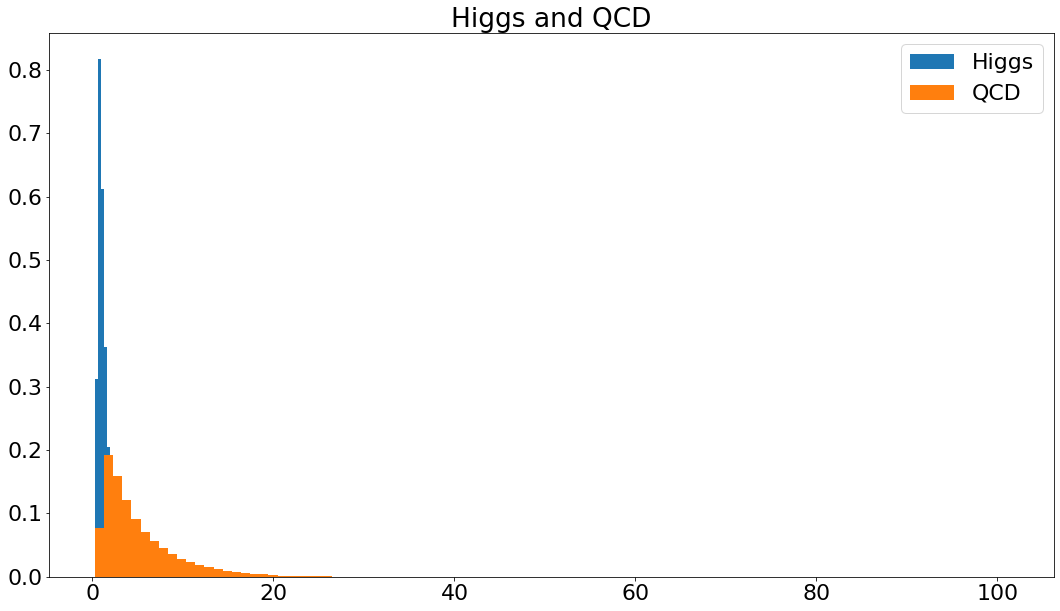

In [23]:
plt.hist(H_d2,bins=100,density = True);
plt.hist(QCD_d2,bins=100, density=True);
plt.legend(['Higgs', 'QCD']);
plt.title('Higgs and QCD');


General shapes of distribution of the two data are similar. Though one clear difference is that Higgs data is more peaked around $D_2=1$, which means that $e_3$ and $e_2$ are of similar values. On the other hand, QCD is more spread over in the region $D_2$ is greater than 1, which tells us that $e_3$ and $e_2$ maybe not often be a similar value.

## $a_3$, the angularity, an observable related to the symmetry of energy flow inside a jet
This was calculated by,

$$\tau_{-2}=\frac{1}{m_J}\sum_{i\in{J}}E_isin^{-2}(\theta_i)cos^3(\theta_i)$$

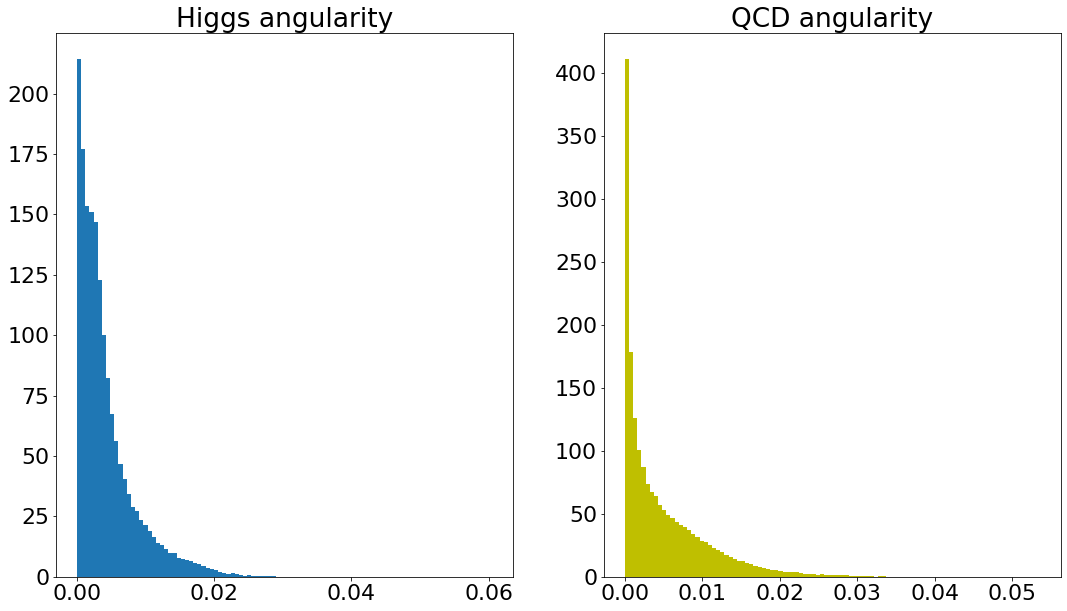

In [24]:
H_angularity = signal['angularity'][:]
QCD_angularity = background['angularity'][:]

fig, ax = plt.subplots(1,2)
ax[0].hist(H_angularity, bins=100, density=True);
ax[0].set_title('Higgs angularity')
ax[1].hist(QCD_angularity, bins=100, density=True, color = 'y');
ax[1].set_title('QCD angularity');

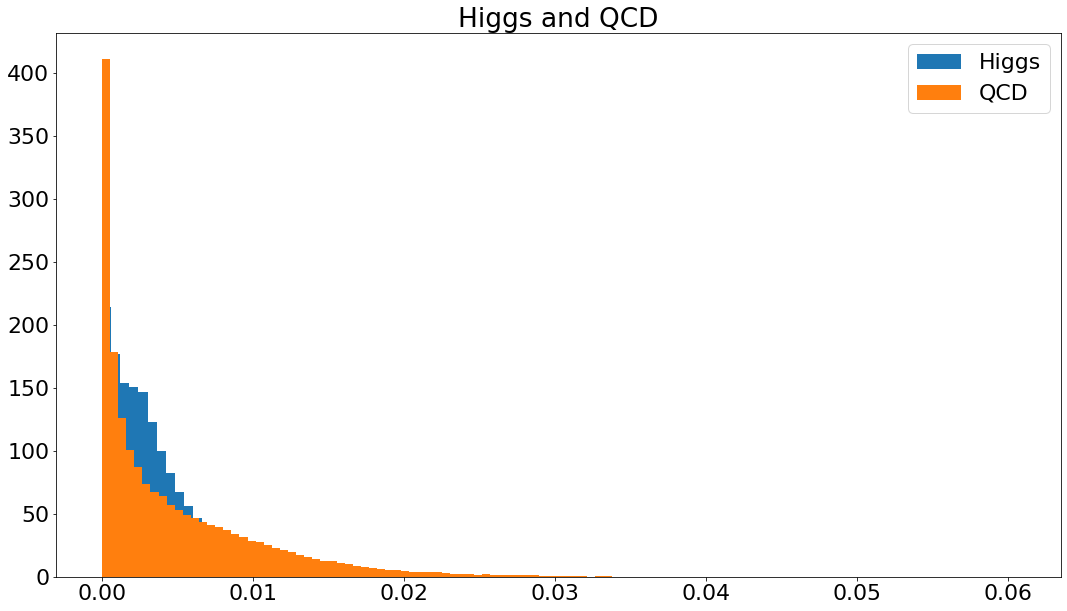

In [25]:
plt.hist(H_angularity,bins=100,density = True);
plt.hist(QCD_angularity,bins=100, density=True);
plt.legend(['Higgs', 'QCD']);
plt.title('Higgs and QCD');

Higgs and QCD data distribution show similar traits. Both spike up around at very close to $Angularity=0$, while this time, Higgs data is more spread over the region.

## $\tau_N$, the "N-subjettiness"


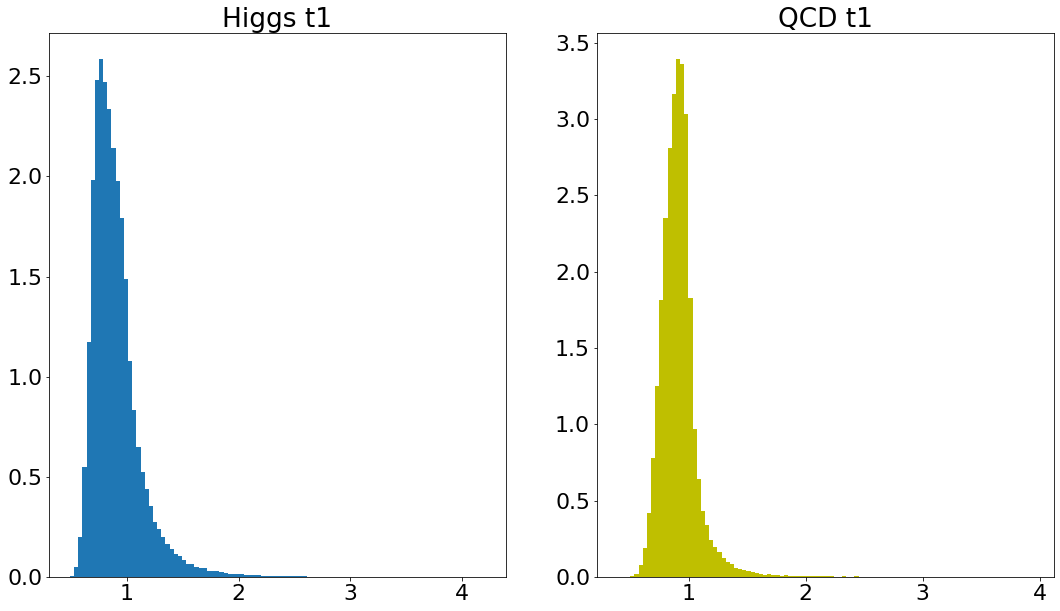

In [41]:
H_t1 = signal['t1'][:]
QCD_t1 = background['t1'][:]

fig, ax = plt.subplots(1,2)
ax[0].hist(H_t1, bins=100, density=True);
ax[0].set_title('Higgs t1')
ax[1].hist(QCD_t1, bins=100, density=True, color = 'y');
ax[1].set_title('QCD t1');

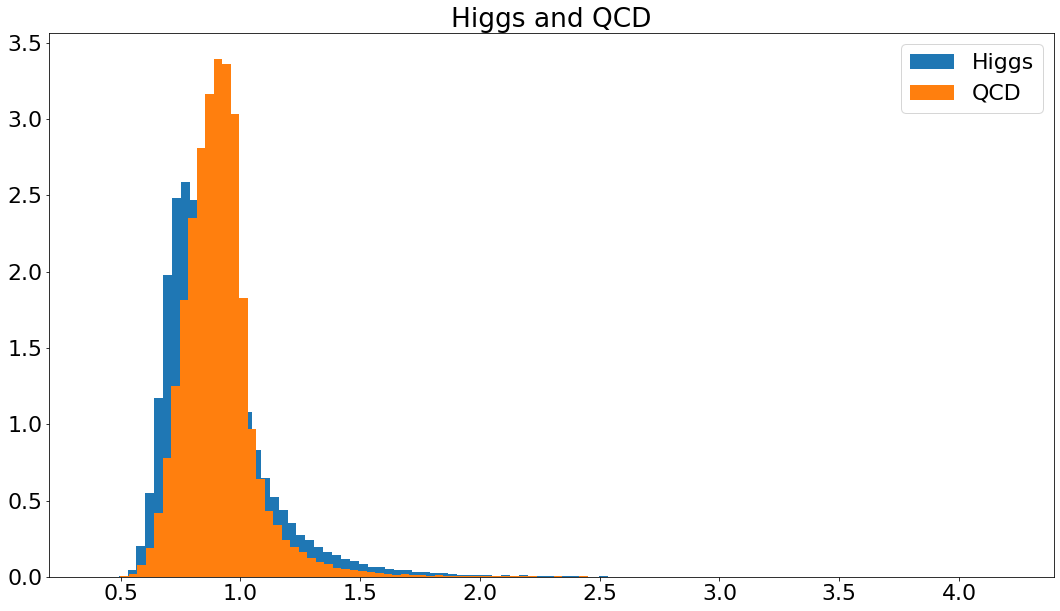

In [27]:
plt.hist(H_t1,bins=100,density = True);
plt.hist(QCD_t1,bins=100, density=True);
plt.legend(['Higgs', 'QCD']);
plt.title('Higgs and QCD');


The two data shows quite similar distribution. Both has the peak at around $t_1=0.7~0.9$ and a spread of $\pm{0.4}$ ~ $0.5$. Since the difference is relatively subtle to distinguish in between the two data sets.

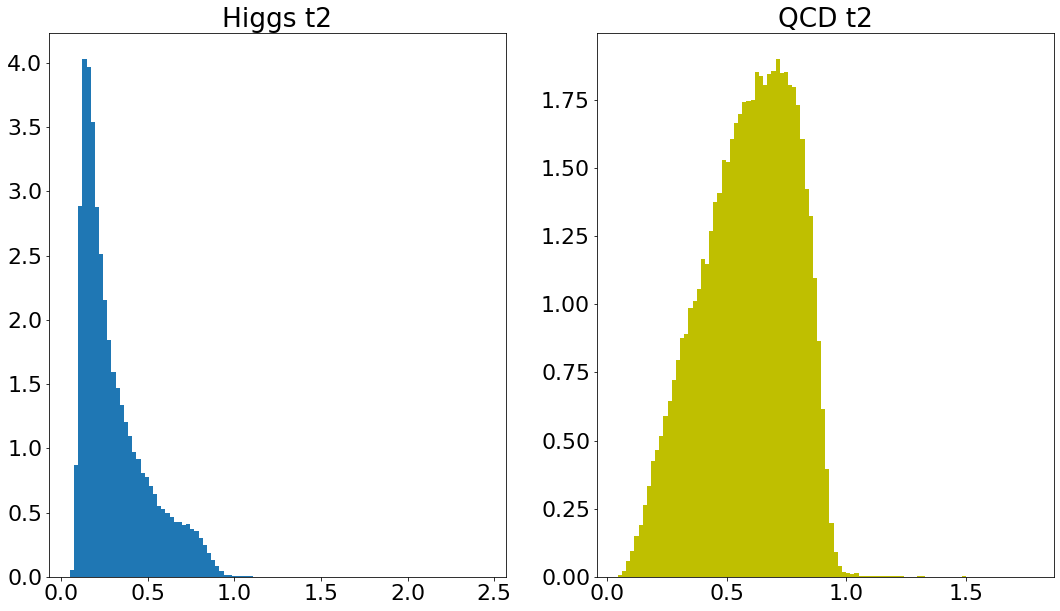

In [42]:
H_t2 = signal['t2'][:]
QCD_t2 = background['t2'][:]

fig, ax = plt.subplots(1,2)
ax[0].hist(H_t2, bins=100, density=True);
ax[0].set_title('Higgs t2')
ax[1].hist(QCD_t2, bins=100, density=True, color = 'y');
ax[1].set_title('QCD t2');

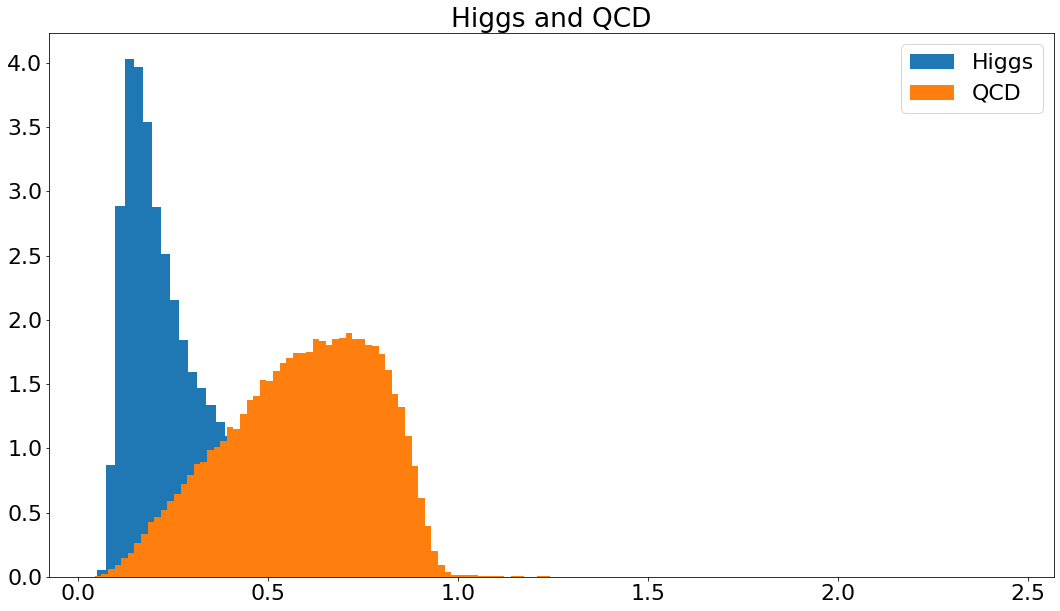

In [29]:
plt.hist(H_t2,bins=100,density = True);
plt.hist(QCD_t2,bins=100, density=True);
plt.legend(['Higgs', 'QCD']);
plt.title('Higgs and QCD');

$t_2$ distribution shows more clear distinction between two data sets. Higgs data clearly shows the peak at about $t_2=0.2$, while the QCD data is quite spread over the region $t_2=0$ - $1.0$.

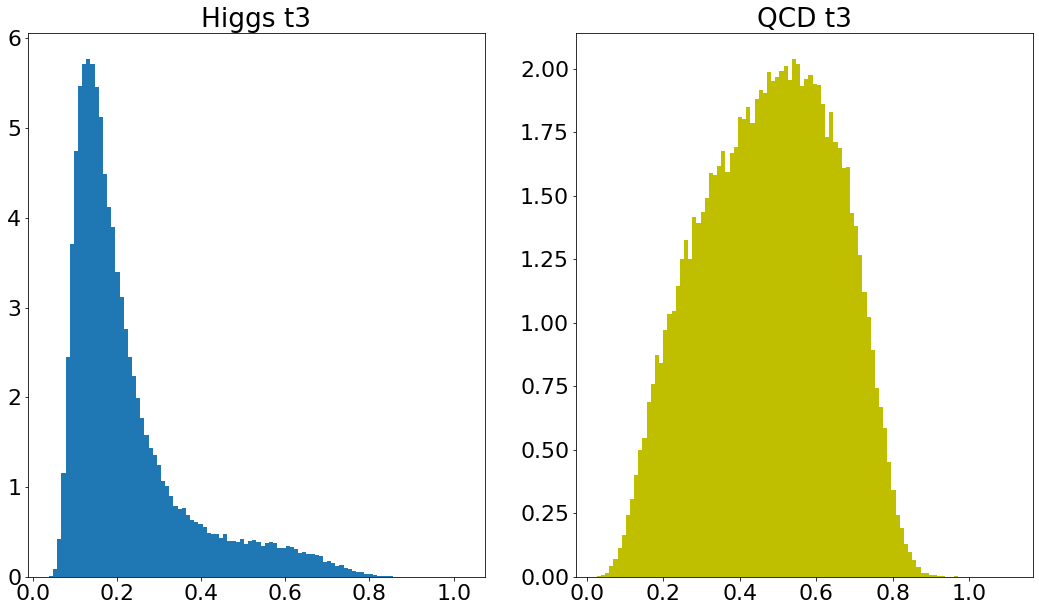

In [43]:
H_t3 = signal['t3'][:]
QCD_t3 = background['t3'][:]

fig, ax = plt.subplots(1,2)
ax[0].hist(H_t3, bins=100, density=True);
ax[0].set_title('Higgs t3')
ax[1].hist(QCD_t3, bins=100, density=True, color = 'y');
ax[1].set_title('QCD t3');

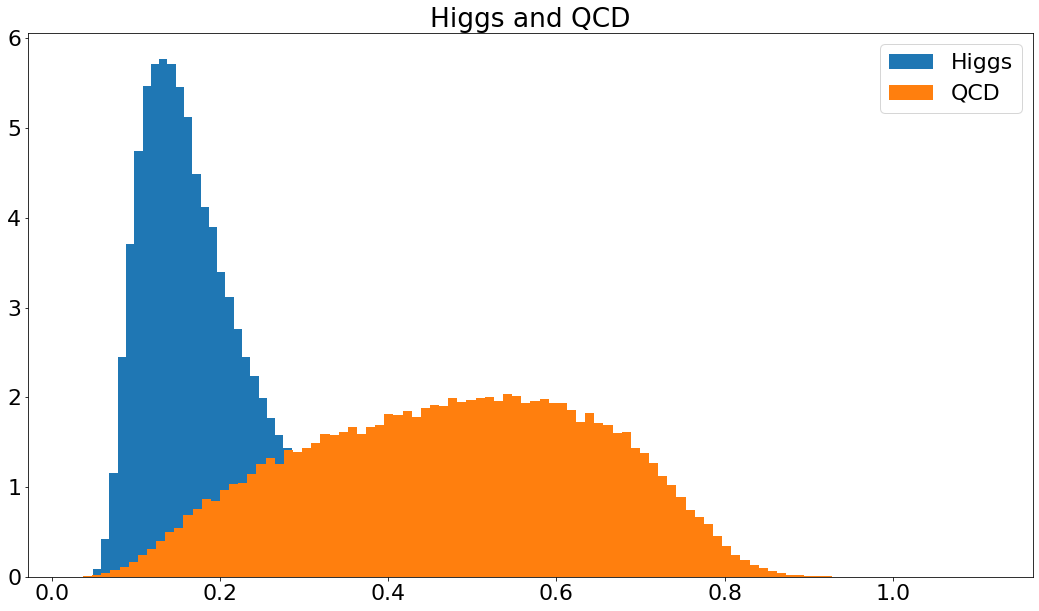

In [31]:
plt.hist(H_t3,bins=100,density = True);
plt.hist(QCD_t3,bins=100, density=True);
plt.legend(['Higgs', 'QCD']);
plt.title('Higgs and QCD');

$t_3$ also shows a more distinct distribution between the two. The QCD data smoothly ranges from $t_2$ 0.1 - 0.8 and the Higgs data has a much higher spike at around 0.15 but trails off towards the 0.3 - 0.7 range. An interesting observation is that the higgs data spikes where the QCD data is not as common. The QCD is much more flattened compared to $t_2$ and the area of peak for Higgs is more narrow. 

## $\tau_{NM}$, the ratio of "N-subjettiness" to "M-subjettiness"

Calculated by $$t_{NM}=\frac{t_N}{t_M}$$

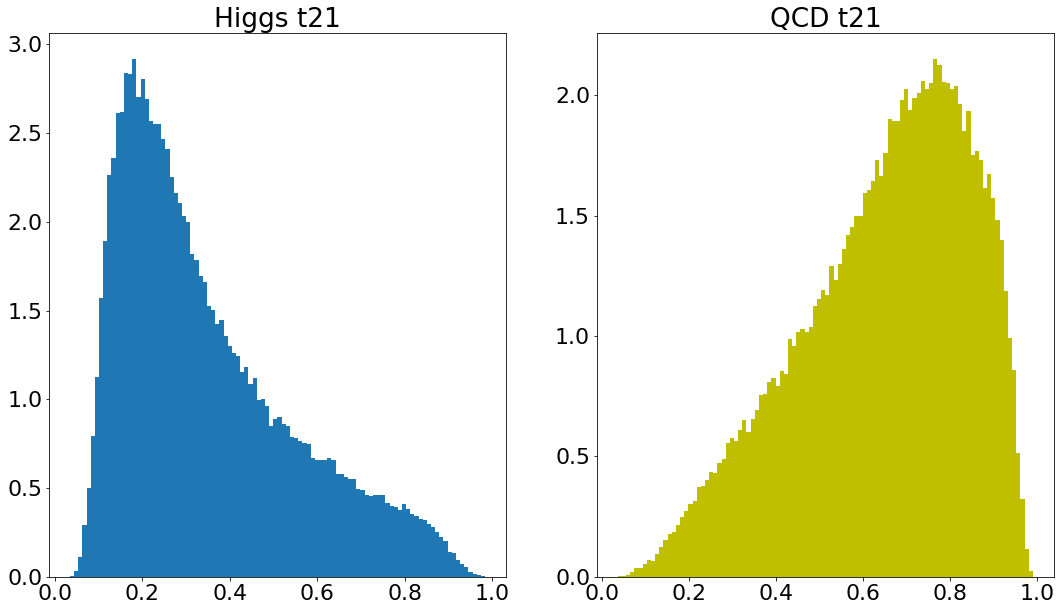

In [44]:
H_t21 = signal['t21'][:]
QCD_t21 = background['t21'][:]

fig, ax = plt.subplots(1,2)
ax[0].hist(H_t21, bins=100, density=True);
ax[0].set_title('Higgs t21')
ax[1].hist(QCD_t21, bins=100, density=True, color = 'y');
ax[1].set_title('QCD t21');

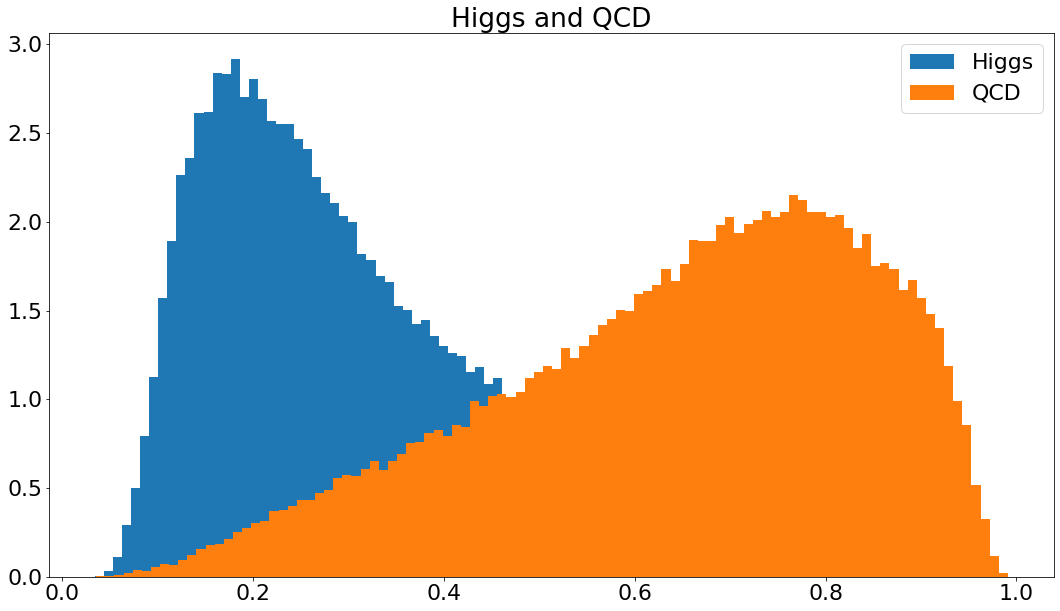

In [33]:
plt.hist(H_t21,bins=100,density = True);
plt.hist(QCD_t21,bins=100, density=True);
plt.legend(['Higgs', 'QCD']);
plt.title('Higgs and QCD');

From the above plots, we can see that the Higgs data and QCD data are nearly opposite of each other. The Higgs data peaks on the left side and gradually gets smaller while the QCD starts off small and gradually reaches its peak on the right side. Even though $t_1$ was similar, $t_2$ had clear distinctions causing this difference when plotting.

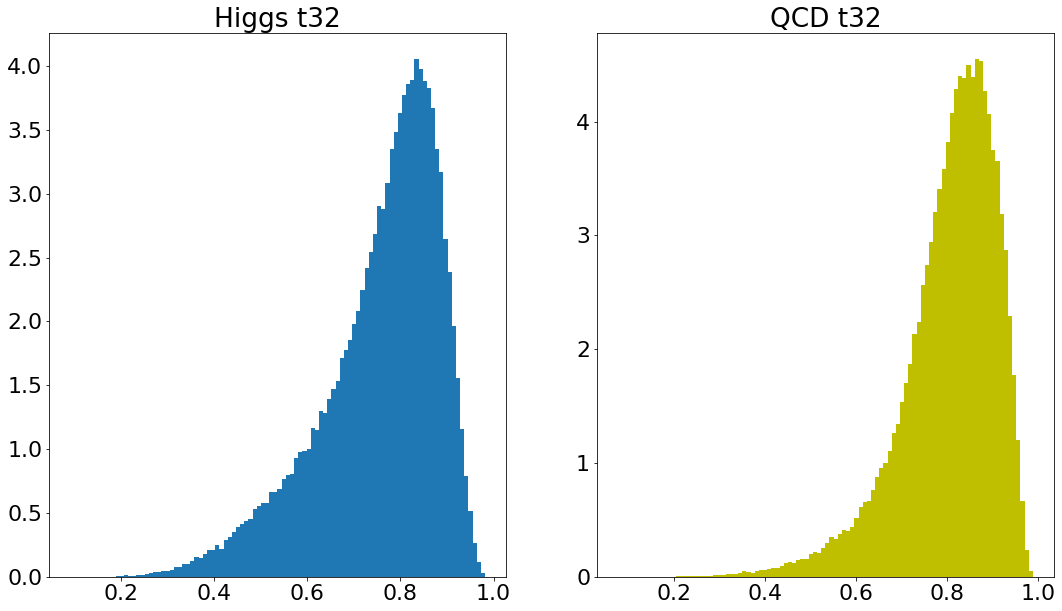

In [45]:
H_t32 = signal['t32'][:]
QCD_t32 = background['t32'][:]

fig, ax = plt.subplots(1,2)
ax[0].hist(H_t32, bins=100, density=True);
ax[0].set_title('Higgs t32')
ax[1].hist(QCD_t32, bins=100, density=True, color = 'y');
ax[1].set_title('QCD t32');

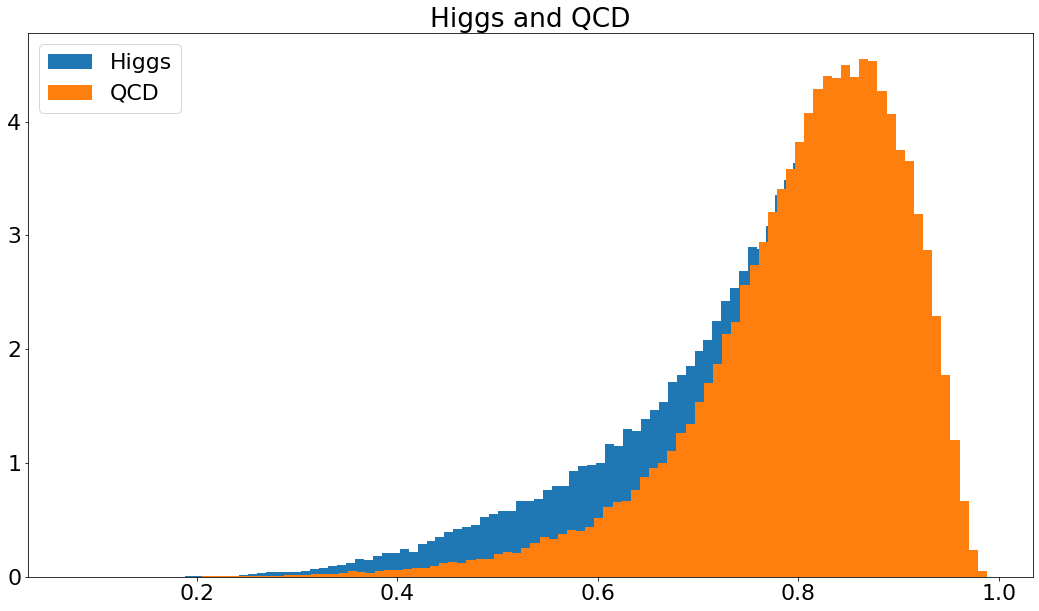

In [35]:
plt.hist(H_t32,bins=100,density = True);
plt.hist(QCD_t32,bins=100, density=True);
plt.legend(['Higgs', 'QCD']);
plt.title('Higgs and QCD');

$t_2$ and $t_3$ did not have much distinction between the two and so when plotted we can see the two distributions are nearly the same following the same growth trail to peak on the right region. Because $t_2$ and $t_3$ had subtle differences the ratio between Higgs and QCD was nearing the value 1. The peak for Higgs is lower than the peak of QCD. This is because $t_3$ dataset was spread over in the narrower region than $t_2$ dataset

## $k_t\Delta R$, the angular separation of the branches of a jet

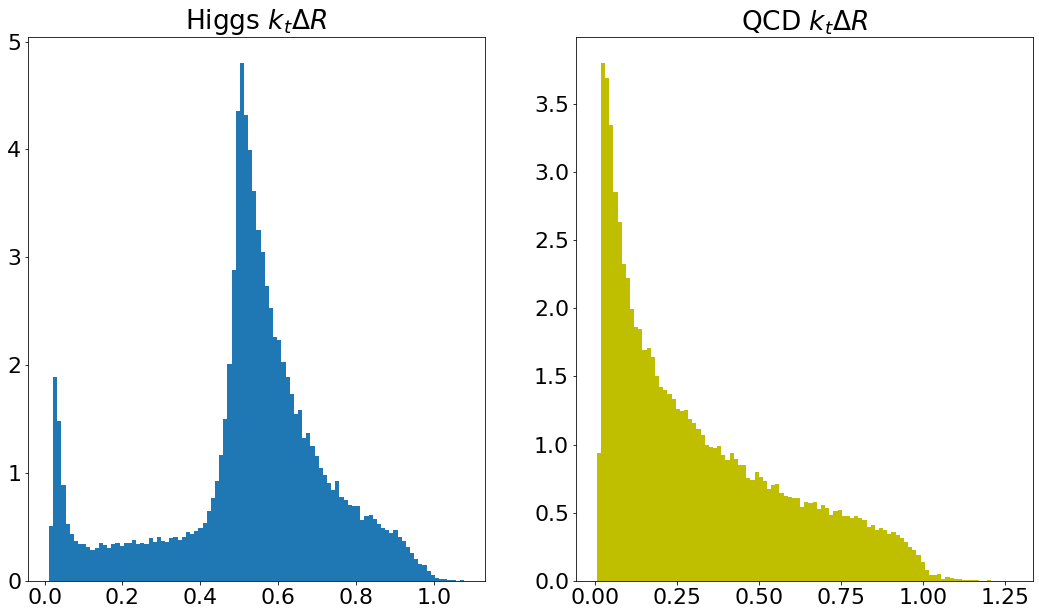

In [36]:
H_KtDeltaR = signal['KtDeltaR'][:]
QCD_KtDeltaR = background['KtDeltaR'][:]

fig, ax = plt.subplots(1,2)
ax[0].hist(H_KtDeltaR, bins=100, density=True);
ax[0].set_title('Higgs $k_t\Delta R$')
ax[1].hist(QCD_KtDeltaR, bins=100, density=True, color = 'y');
ax[1].set_title('QCD $k_t\Delta R$');

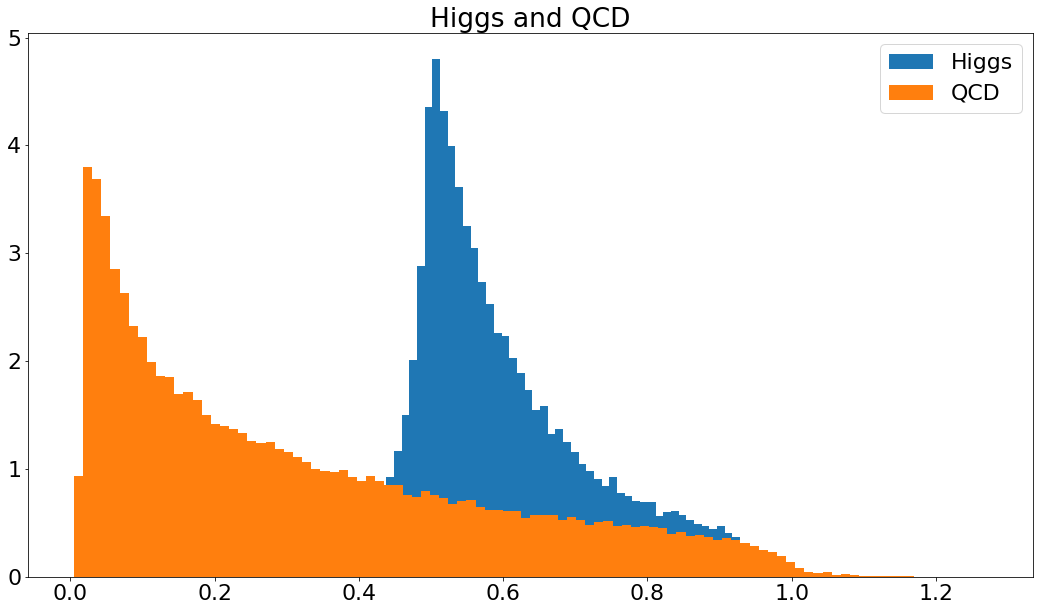

In [37]:
plt.hist(H_KtDeltaR,bins=100,density = True);
plt.hist(QCD_KtDeltaR,bins=100, density=True);
plt.legend(['Higgs', 'QCD']);
plt.title('Higgs and QCD');

This dataset shows clear distinction. Higgs data has a peak around at aorund 0.6 while QCD has a peak around 0.02. Also, Higgs data seems to have another peak point at 0.05, but QCD only has one peak and gradually decreases to 0 at around 1.2.